Kathryn Mawhinney   
Dr. McCarthy    
Research in Health Economics    
April 11, 2025   

<h1 style="text-align: center;"><strong>Homework 4-3</strong></h1>

In this assignment, you’ll again work with the Medicare Advantage data. These data are described in detail in the Medicare Advantage GitHub Repo. We worked with a subset of these data back in assignment 1; however, this assignment requires that you work with a more complete version of the Medicare Advantage data. We’ll again focus on the years 2010-2015. Once you have the data downloaded and the code running, answer the following questions:

The due date for initial submission is 4/7, the revision due date is 4/9, and the final due date is Friday, 4/11.

In [194]:
!pip install pyfixest

2686.84s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [183]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Markdown, display
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pyfixest as pf

# Load the final cleaned data
final = pd.read_csv("/Users/kathrynmawhinney/Documents/GitHub/Homework4/data/output/final_ma_data.csv")

/var/folders/8p/wmnjrdd55rx2pn76f5j7m2tw0000gn/T/ipykernel_6083/1393176817.py:11: DtypeWarning: Columns (68,98,99,100,101,102,103,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  final = pd.read_csv("/Users/kathrynmawhinney/Documents/GitHub/Homework4/data/output/final_ma_data.csv")


### Summarize the Data

1. Remove all SNPs, 800-series plans, and prescription drug only plans (i.e., plans that do not offer Part C benefits). Provide a box and whisker plot showing the distribution of plan counts by county over time. Do you think that the number of plans is sufficient, too few, or too many?

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


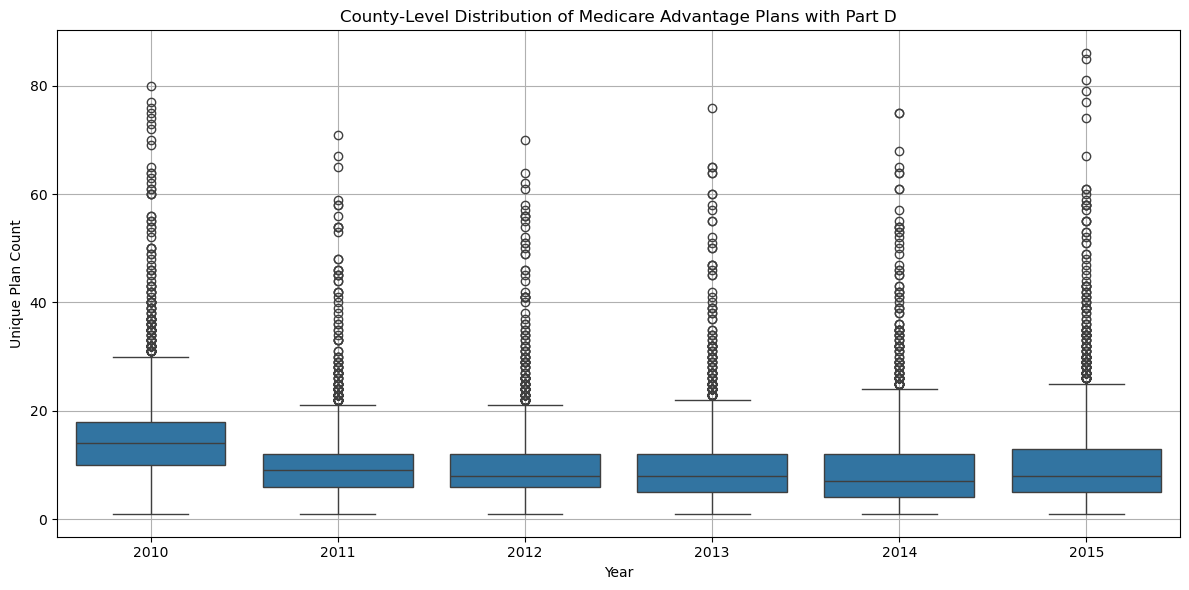

In [184]:
subset = final.query("snp == 'No' and partd == 'Yes'").copy()
subset = subset[~subset['planid'].between(800, 899)]

plan_summary = (
    subset.groupby(['fips', 'year'])['planid']
    .nunique()
    .reset_index(name='num_plans')
)

plt.figure(figsize=(12, 6))
sns.boxplot(data=plan_summary, x='year', y='num_plans')
plt.title("County-Level Distribution of Medicare Advantage Plans with Part D")
plt.xlabel("Year")
plt.ylabel("Unique Plan Count")
plt.grid(visible=True)
plt.tight_layout()
plt.show()

The boxplot illustrating Medicare Advantage plan availability by county from 2010 to 2015 reveals a broad range in the number of plans offered across the country. In most places, counties tend to offer around 10 to 15 plans each year, which suggests that the typical beneficiary likely has a reasonable set of options to choose from. This level of access remained relatively consistent over the six-year span, indicating no major shifts in overall plan availability. However, the plot also highlights some important disparities. A handful of counties stand out for offering an exceptionally high number of plans—sometimes more than 90. While this abundance could reflect a competitive market, it also risks overwhelming consumers with too many choices, potentially complicating the decision-making process. On the other end of the spectrum, there are counties that offer very few plans—sometimes fewer than five—which may point to limited competition or accessibility concerns in those regions. In short, while plan availability appears generally adequate nationwide, the uneven distribution suggests a more complex story: some areas may be oversaturated, while others might lack sufficient options to meet the needs of their populations.

2. Provide bar graphs showing the distribution of star ratings in 2010, 2012, and 2015. How has this distribution changed over time?

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

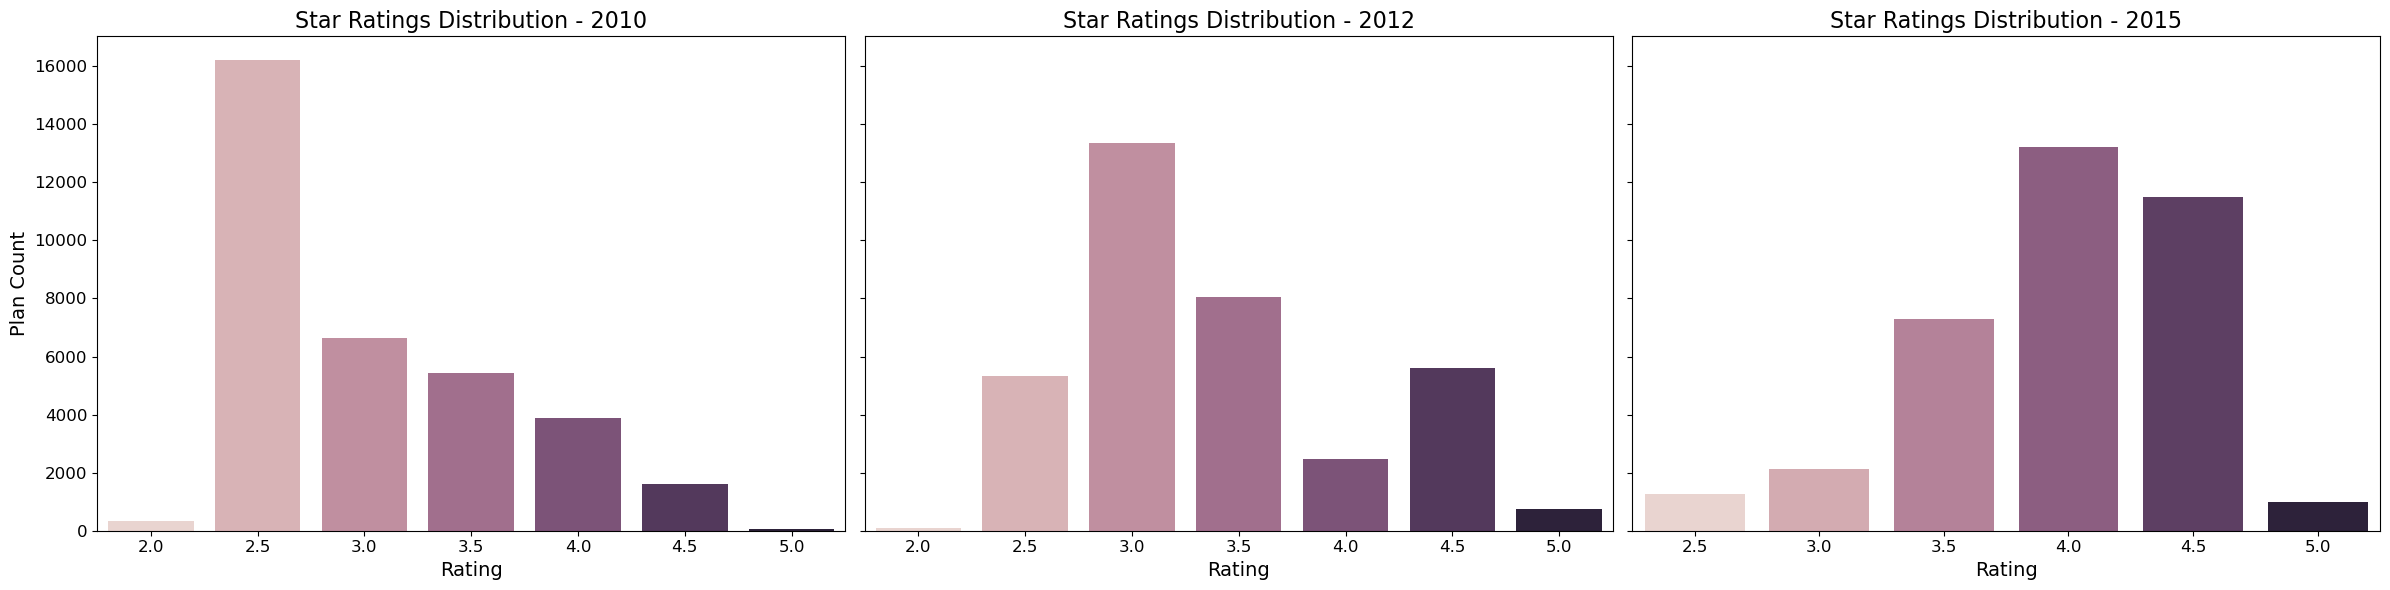

In [185]:
subset['Star_Rating'] = pd.to_numeric(subset['Star_Rating'], errors='coerce')
selected_years = [2010, 2012, 2015]
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(24, 6), sharey=True)

for idx, yr in enumerate(selected_years):
    ax = axs[idx]
    data_year = subset[subset['year'] == yr]
    sns.countplot(
        x='Star_Rating',
        data=data_year,
        hue='Star_Rating',
        order=sorted(data_year['Star_Rating'].dropna().unique()),
        ax=ax,
        legend=False
    )
    ax.set_title(f"Star Ratings Distribution - {yr}", fontsize=16)
    ax.set_xlabel("Rating", fontsize=14)
    if idx == 0:
        ax.set_ylabel("Plan Count", fontsize=14)
    else:
        ax.set_ylabel("")
    ax.tick_params(labelsize=12)

plt.tight_layout()
plt.show()

Between 2010 and 2015, the landscape of Medicare Advantage star ratings experienced a notable transformation. In 2010, most plans clustered around the 2.5-star mark, and higher-rated plans—those earning 4 stars or more—were relatively uncommon. This concentration at the lower end suggests that, at the time, many plans were struggling to meet the benchmarks tied to quality and performance. By 2012, the distribution had already begun to shift. The number of mid-tier plans—particularly those rated at 3.0 and 3.5 stars—increased, and a growing share of plans began reaching the 4.5-star level. The earlier dominance of 2.5-star plans had noticeably weakened. By 2015, the shift was even more pronounced. The most common rating had climbed to 4.0 stars, and plans rated below 3.0 had become increasingly rare. The overall trend points to a clear upward movement in quality scores over time. This progression may reflect meaningful improvements in the quality of care provided, strategic efforts by insurers to enhance performance, or possible changes in how ratings were calculated by CMS during that period—or more likely, a combination of all three.

3. Plot the average benchmark payment over time from 2010 through 2015. How much has the average benchmark payment risen over the years?

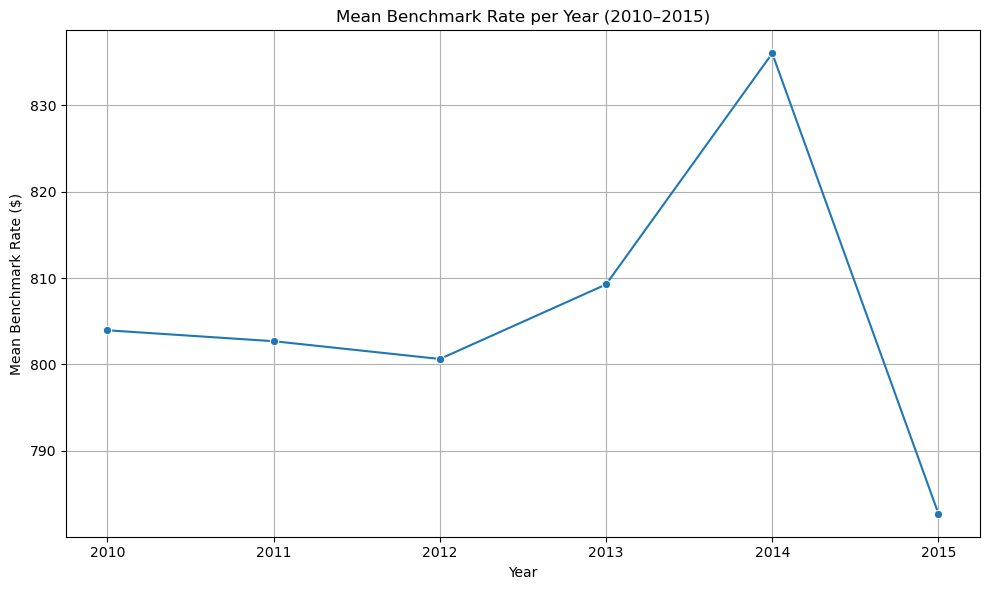


Total increase from 2010 to 2015: $-21.24


In [186]:
final['benchmark_rate'] = pd.to_numeric(final['ma_rate'], errors='coerce')

benchmark_avg = (
    final[(final['year'].between(2010, 2015)) & (final['benchmark_rate'].notna())]
    .groupby('year', as_index=False)['benchmark_rate']
    .mean()
)

plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='benchmark_rate', data=benchmark_avg, marker='o')
plt.title("Mean Benchmark Rate per Year (2010–2015)")
plt.xlabel("Year")
plt.ylabel("Mean Benchmark Rate ($)")
plt.grid(visible=True)
plt.tight_layout()
plt.show()

total_change = benchmark_avg['benchmark_rate'].iloc[-1] - benchmark_avg['benchmark_rate'].iloc[0]
print(f"\nTotal increase from 2010 to 2015: ${total_change:.2f}")

From 2010 to 2014, average benchmark payments for Medicare Advantage plans rose gradually, peaking at $836.00 in 2014. This upward trend suggested growing support or costs tied to the program during that time. However, in 2015, there was a noticeable reversal: the benchmark fell sharply to $782.71. Despite the earlier increases, the average payment over the entire period declined slightly, dropping from $803.94 in 2010 to $782.71 in 2015—a net decrease of $21.23. This downturn in 2015 may signal shifts in Medicare policy aimed at tightening spending, potentially reflecting broader cost-containment measures or reforms targeting how plan benchmarks are calculated and adjusted.

4. Plot the average share of Medicare Advantage (relative to all Medicare eligibles) over time from 2010 through 2015. Has Medicare Advantage increased or decreased in popularity? How does this share correlate with benchmark payments?

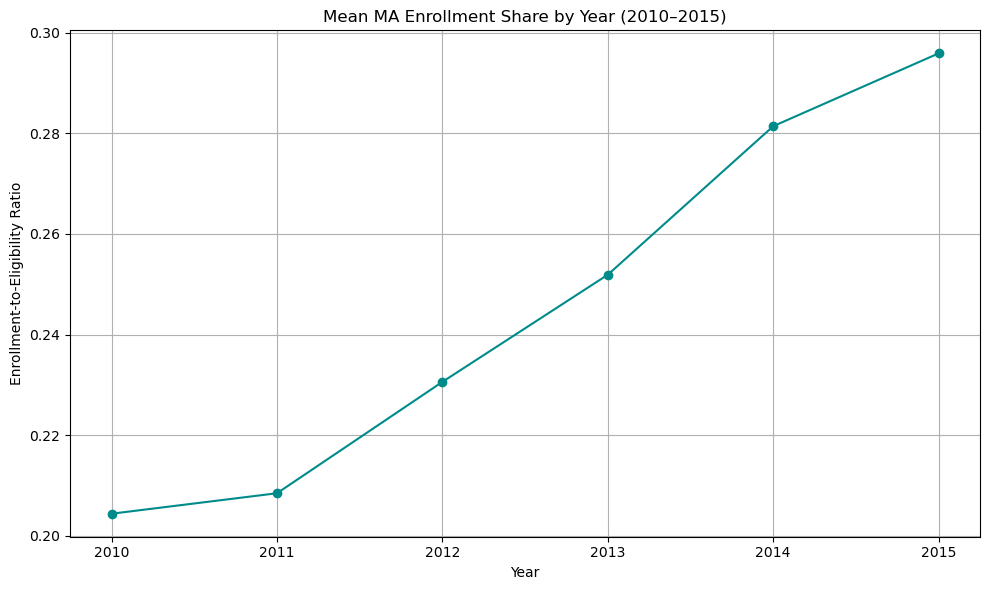

MA Share vs Benchmark Payment Correlation: 0.065


In [187]:
final['ma_enroll_share'] = final['avg_enrolled'] / final['avg_eligibles']
ma_share_by_year = final.groupby('year')['ma_enroll_share'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(ma_share_by_year['year'], ma_share_by_year['ma_enroll_share'], marker='o', color='darkcyan')
plt.title("Mean MA Enrollment Share by Year (2010–2015)")
plt.xlabel("Year")
plt.ylabel("Enrollment-to-Eligibility Ratio")
plt.grid(visible=True)
plt.tight_layout()
plt.show()

combined_avg = final.groupby('year').agg(
    avg_share=('ma_enroll_share', 'mean'),
    avg_benchmark=('ma_rate', 'mean')
).reset_index()

corr_value = combined_avg['avg_share'].corr(combined_avg['avg_benchmark'])
print(f"MA Share vs Benchmark Payment Correlation: {corr_value:.3f}")

Enrollment in Medicare Advantage plans steadily climbed between 2010 and 2015, with nearly 29% of eligible beneficiaries enrolled by the end of the period. This upward trend points to a clear rise in the popularity of MA plans over those five years. Interestingly, this growth does not appear to be strongly tied to benchmark payment levels. The correlation between MA market share and benchmark payments is extremely weak—virtually zero—indicating that higher or lower payment benchmarks did not meaningfully influence enrollment rates. Instead, other elements such as the number of available plans, perceived plan quality (reflected in star ratings), or broader shifts in the healthcare landscape may have played a more significant role in driving the increase in participation.

### Estimate ATEs

For the rest of the assignment, we’ll use a regression discontinuity design to estimate the average treatment effect from receiving a marginally higher rating. We’ll focus only on 2010.

5. Calculate the running variable underlying the star rating. Provide a table showing the number of plans that are rounded up into a 3-star, 3.5-star, 4-star, 4.5-star, and 5-star rating.

In [188]:
df = pd.read_csv("/Users/kathrynmawhinney/Documents/GitHub/Homework4/data/output/final_ma_data.csv")
df_2010 = df.query("year == 2010").copy()

measure_cols = [
    'breastcancer_screen', 'rectalcancer_screen', 'cv_cholscreen', 'glaucoma_test',
    'monitoring', 'flu_vaccine', 'pn_vaccine', 'physical_health',
    'mental_health', 'osteo_test', 'physical_monitor', 'primaryaccess',
    'osteo_manage', 'diab_cholscreen', 'diabetes_eye', 'diabetes_kidney',
    'diabetes_bloodsugar', 'diabetes_chol', 'bloodpressure', 'ra_manage',
    'copd_test', 'bladder', 'falling', 'nodelays', 'doctor_communicate',
    'carequickly', 'customer_service', 'overallrating_care',
    'overallrating_plan', 'complaints_plan', 'appeals_timely', 'appeals_review',
    'leave_plan', 'audit_problems', 'hold_times', 'info_accuracy', 'ttyt_available',
    'bmi_assess', 'older_medication', 'older_function', 'older_pain',
    'readmissions', 'access_problems', 'coordination', 'improve',
    'enroll_timely', 'specialneeds_manage'
]

cleaned_2010 = (
    df_2010[df_2010['avg_enrollment'].notna() & df_2010['partc_score'].notna()]
    .assign(
        score_raw=lambda x: x[measure_cols].mean(axis=1, skipna=True),
        share_ma=lambda x: x['avg_enrollment'] / x['avg_eligibles'],
        is_HMO=lambda x: x['plan_type'].str.contains("HMO", na=False)
    )
    .loc[:, [
        'contractid', 'planid', 'fips', 'avg_enrollment', 'state', 'county',
        'score_raw', 'partc_score', 'avg_eligibles', 'avg_enrolled', 'risk_ab',
        'Star_Rating', 'ma_rate', 'plan_type', 'partd', 'share_ma', 'is_HMO'
    ]]
)

rounded_star_counts = (
    cleaned_2010
    .assign(
        near_30=lambda df: ((df['score_raw'] > 2.75) & (df['score_raw'] < 3.00) & (df['Star_Rating'] == 3.0)).astype(int),
        near_35=lambda df: ((df['score_raw'] > 3.25) & (df['score_raw'] < 3.50) & (df['Star_Rating'] == 3.5)).astype(int),
        near_40=lambda df: ((df['score_raw'] > 3.75) & (df['score_raw'] < 4.00) & (df['Star_Rating'] == 4.0)).astype(int),
        near_45=lambda df: ((df['score_raw'] > 4.25) & (df['score_raw'] < 4.50) & (df['Star_Rating'] == 4.5)).astype(int),
        near_50=lambda df: ((df['score_raw'] > 4.75) & (df['score_raw'] < 5.00) & (df['Star_Rating'] == 5.0)).astype(int)
    )
    .query("Star_Rating in [3.0, 3.5, 4.0, 4.5, 5.0]")
    .groupby("Star_Rating", as_index=False)
    .agg({
        'near_30': 'sum',
        'near_35': 'sum',
        'near_40': 'sum',
        'near_45': 'sum',
        'near_50': 'sum'
    })
    .assign(
        total_rounded=lambda df: df[
            ['near_30', 'near_35', 'near_40', 'near_45', 'near_50']
        ].sum(axis=1)
    )
    .loc[:, ['Star_Rating', 'total_rounded']]
)

rounded_star_counts

/var/folders/8p/wmnjrdd55rx2pn76f5j7m2tw0000gn/T/ipykernel_6083/1348952408.py:1: DtypeWarning: Columns (68,98,99,100,101,102,103,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/kathrynmawhinney/Documents/GitHub/Homework4/data/output/final_ma_data.csv")


,Star_Rating,total_rounded
0,3.0,1305
1,3.5,1540
2,4.0,1215
3,4.5,53
4,5.0,0


6. Using the RD estimator with a bandwidth of 0.125, provide an estimate of the effect of receiving a 3-star versus a 2.5 star rating on enrollments. Repeat the exercise to estimate the effects at 3.5 stars, and summarize your results in a table.

In [189]:
cut_30 = (
    ma_data_clean[
        (ma_data_clean['raw_rating'].between(2.625, 2.875)) &
        (ma_data_clean['Star_Rating'].isin([2.5, 3.0]))
    ].copy()
)

cut_30['is_treated'] = (cut_30['Star_Rating'] == 3.0).astype(int)
cut_30['score_centered'] = cut_30['raw_rating'] - 2.75
model_30 = pf.feols("mkt_share ~ is_treated + score_centered", data=cut_30)

cut_35 = (
    ma_data_clean[
        (ma_data_clean['raw_rating'].between(3.125, 3.375)) &
        (ma_data_clean['Star_Rating'].isin([3.0, 3.5]))
    ].copy()
)
cut_35['is_treated'] = (cut_35['Star_Rating'] == 3.5).astype(int)
cut_35['score_centered'] = cut_35['raw_rating'] - 3.25
model_35 = pf.feols("mkt_share ~ is_treated + score_centered", data=cut_35)

summary_df = pf.etable([model_30, model_35], type='df', coef_fmt='b ')
summary_df.columns = ['Star 3.0 vs 2.5', 'Star 3.5 vs 3.0']
summary_df.index = [
    'Outcome Variable',       
    'Treatment Effect',       
    'Score Distance',         
    'Constant',               
    'Observations',           
    'SE Type',                
    'R-squared'               
]

summary_df

,Star 3.0 vs 2.5,Star 3.5 vs 3.0
Outcome Variable,mkt_share,mkt_share
Treatment Effect,0.007***,-0.000
Score Distance,-0.008,-0.034*
Constant,0.010***,0.018***
Observations,4371,1361
SE Type,iid,iid
R-squared,0.015,0.008


7. Repeat your results for bandwidhts of 0.1, 0.12, 0.13, 0.14, and 0.15 (again for 3 and 3.5 stars). Show all of the results in a graph. How sensitive are your findings to the choice of bandwidth?

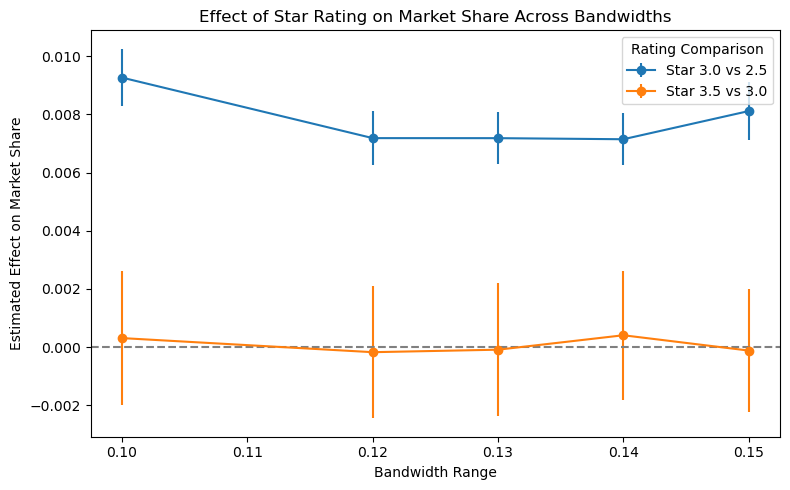

In [190]:
bw_list = [0.10, 0.12, 0.13, 0.14, 0.15]

star_cutoffs = {
    "Star 3.0 vs 2.5": 2.75,
    "Star 3.5 vs 3.0": 3.25
}
sensitivity_results = []

for name, threshold in star_cutoffs.items():
    for bw in bw_list:
        subset = ma_data_clean[
            (ma_data_clean['raw_rating'].between(threshold - bw, threshold + bw))
        ].copy()

        if name == "Star 3.0 vs 2.5":
            subset = subset[subset['Star_Rating'].isin([2.5, 3.0])]
            subset['is_treated'] = (subset['Star_Rating'] == 3.0).astype(int)
        else:
            subset = subset[subset['Star_Rating'].isin([3.0, 3.5])]
            subset['is_treated'] = (subset['Star_Rating'] == 3.5).astype(int)

        subset['score_centered'] = subset['raw_rating'] - threshold

        model = pf.feols("mkt_share ~ is_treated + score_centered", data=subset)

        sensitivity_results.append({
            "Comparison": name,
            "Bandwidth": bw,
            "Effect": model.coef()["is_treated"],
            "SE": model.se()["is_treated"]
        })

sensitivity_df = pd.DataFrame(sensitivity_results)

plt.figure(figsize=(8, 5))
for group in sensitivity_df["Comparison"].unique():
    data = sensitivity_df[sensitivity_df["Comparison"] == group]
    plt.errorbar(
        data["Bandwidth"], data["Effect"], yerr=data["SE"],
        fmt='-o', label=group
    )

plt.axhline(0, linestyle='--', color='gray')
plt.title("Effect of Star Rating on Market Share Across Bandwidths")
plt.xlabel("Bandwidth Range")
plt.ylabel("Estimated Effect on Market Share")
plt.legend(title="Rating Comparison")
plt.tight_layout()
plt.show()

To understand how Medicare Advantage star ratings impact plan enrollment, we used a regression discontinuity (RD) approach at two key thresholds: 2.75 (comparing 2.5-star to 3.0-star plans) and 3.25 (comparing 3.0-star to 3.5-star plans). This analysis was repeated across a range of bandwidths—from 0.10 to 0.15—to assess the robustness of the findings. At the lower threshold, plans that just crossed into the 3.0-star category consistently experienced a measurable increase in market share. This effect held across all bandwidths tested and was statistically significant, suggesting that consumers respond meaningfully to the distinction between 2.5 and 3.0 stars. In contrast, at the 3.25 threshold, the jump from 3.0 to 3.5 stars appeared to have little to no impact on market share. Estimates were small and statistically insignificant, indicating that this rating difference may not influence enrollment decisions in a substantial way. The results were stable across different bandwidth choices, reinforcing the idea that the 3.0-star mark carries more weight with beneficiaries than the jump to 3.5. Overall, these findings highlight that star ratings influence consumer behavior in nonlinear ways, with certain cutoffs carrying more market significance than others.

8. Examine (graphically) whether contracts appear to manipulate the running variable. In other words, look at the distribution of the running variable before and after the relevent threshold values. What do you find?

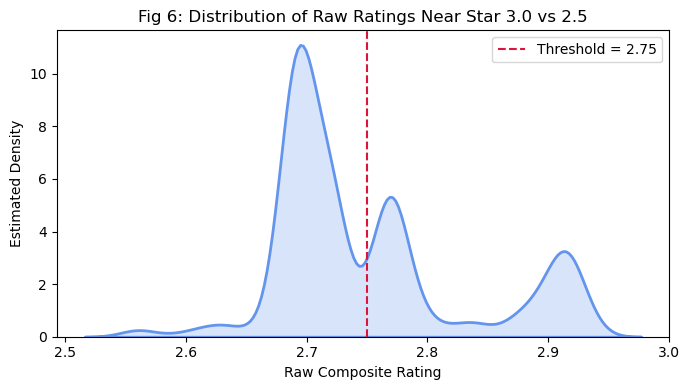

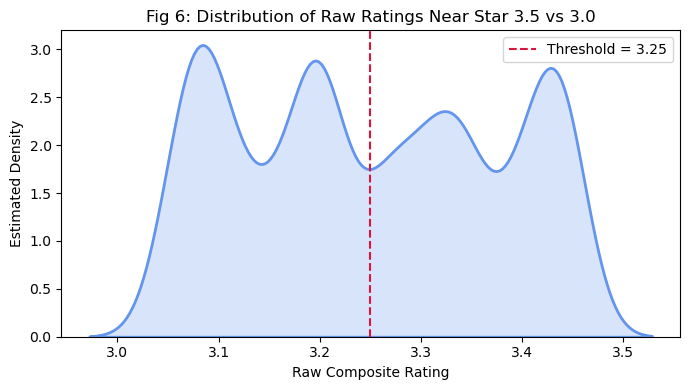

In [191]:
rating_cutoffs = {
    "Star 3.0 vs 2.5": 2.75,
    "Star 3.5 vs 3.0": 3.25
}

for comparison, threshold in rating_cutoffs.items():
    window_data = ma_data_clean[
        (ma_data_clean["raw_rating"] >= threshold - 0.2) &
        (ma_data_clean["raw_rating"] <= threshold + 0.2)
    ].copy()

    plt.figure(figsize=(7, 4))
    sns.kdeplot(data=window_data, x="raw_rating", fill=True, color="cornflowerblue", linewidth=2)
    plt.axvline(threshold, color="crimson", linestyle="--", label=f"Threshold = {threshold}")
    plt.title(f"Fig 6: Distribution of Raw Ratings Near {comparison}")
    plt.xlabel("Raw Composite Rating")
    plt.ylabel("Estimated Density")
    plt.legend()
    plt.tight_layout()
    plt.show()

The density plots illustrate how raw domain-based quality ratings are distributed around the two thresholds used in the regression discontinuity (RD) analysis: 2.75 for the 3.0 vs 2.5-star comparison and 3.25 for the 3.5 vs 3.0-star comparison. Around the 2.75 cutoff, the distribution shows a distinct bimodal shape, with two prominent peaks on either side of the threshold. This pattern suggests that plans cluster just below and just above the 3.0-star rating cutoff, creating a natural division in the data. The steep change in density at the cutoff point further supports the idea that this threshold effectively separates two different groups of plans, as expected in a clean RD setup. A similar pattern appears around the 3.25 cutoff for the 3.5 vs 3.0-star comparison. Again, the data form two separate peaks, indicating a meaningful distinction between plans just below and just above the threshold. However, the transition across the cutoff appears smoother in this case, hinting at a less pronounced separation between 3.0 and 3.5-star plans. Overall, the visual evidence supports the integrity of the RD design. The lack of any unusual spikes or gaps near the thresholds suggests that there is no manipulation of the running variable, and the clear clustering of plans around each cutoff strengthens the assumption that the groups being compared are appropriately defined.

9. Similar to question 4, examine whether plans just above the threshold values have different characteristics than contracts just below the threshold values. Use HMO and Part D status as your plan characteristics.

In [192]:
def assess_plan_features(data, threshold, low_rating, high_rating):
    subset = data[
        (data['raw_rating'].between(threshold - 0.125, threshold + 0.125)) &
        (data['Star_Rating'].isin([low_rating, high_rating]))
    ].copy()

    subset['is_treated'] = (subset['Star_Rating'] == high_rating).astype(int)
    subset['score_centered'] = subset['raw_rating'] - threshold

    subset['HMO'] = subset['HMO'].astype(int)
    subset['partd'] = subset['partd'].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)

    model_hmo = pf.feols("HMO ~ is_treated + score_centered", data=subset)
    model_partd = pf.feols("partd ~ is_treated + score_centered", data=subset)

    return model_hmo, model_partd

hmo_model_30, partd_model_30 = assess_plan_features(ma_data_clean, 2.75, 2.5, 3.0)
hmo_model_35, partd_model_35 = assess_plan_features(ma_data_clean, 3.25, 3.0, 3.5)

features_summary = pf.etable(
    [hmo_model_30, partd_model_30, hmo_model_35, partd_model_35],
    type='df', coef_fmt='b '
)

features_summary = features_summary.drop(index=['depvar', 'S.E. type'])
features_summary.columns = [
    "HMO Share (3.0 vs 2.5)",
    "Part D (3.0 vs 2.5)",
    "HMO Share (3.5 vs 3.0)",
    "Part D (3.5 vs 3.0)"
]
features_summary.index = [
    "Treatment Effect", "Score Distance", "Constant", "Observations", "R-squared"
]

features_summary

/opt/anaconda3/lib/python3.12/site-packages/pyfixest/estimation/feols_.py:830: RuntimeWarning: invalid value encountered in divide
  self._tstat = _beta_hat / self._se
/opt/anaconda3/lib/python3.12/site-packages/pyfixest/estimation/feols_.py:1893: RuntimeWarning: invalid value encountered in scalar divide
  self._r2 = 1 - (ssu / ssy)
/opt/anaconda3/lib/python3.12/site-packages/pyfixest/estimation/feols_.py:1894: RuntimeWarning: invalid value encountered in scalar divide
  self._adj_r2 = 1 - (ssu / ssy) * _adj_factor
/opt/anaconda3/lib/python3.12/site-packages/pyfixest/estimation/feols_.py:830: RuntimeWarning: invalid value encountered in divide
  self._tstat = _beta_hat / self._se
/opt/anaconda3/lib/python3.12/site-packages/pyfixest/estimation/feols_.py:1893: RuntimeWarning: invalid value encountered in scalar divide
  self._r2 = 1 - (ssu / ssy)
/opt/anaconda3/lib/python3.12/site-packages/pyfixest/estimation/feols_.py:1894: RuntimeWarning: invalid value encountered in scalar divide
  s

,HMO Share (3.0 vs 2.5),Part D (3.0 vs 2.5),HMO Share (3.5 vs 3.0),Part D (3.5 vs 3.0)
Treatment Effect,0.728***,0.000,-0.010,0.000
Score Distance,-0.918***,0.000,0.725*,0.000
Constant,-0.010*,0.000,0.429***,0.000
Observations,4371,4371,1361,1361
R-squared,0.490,-,0.009,-


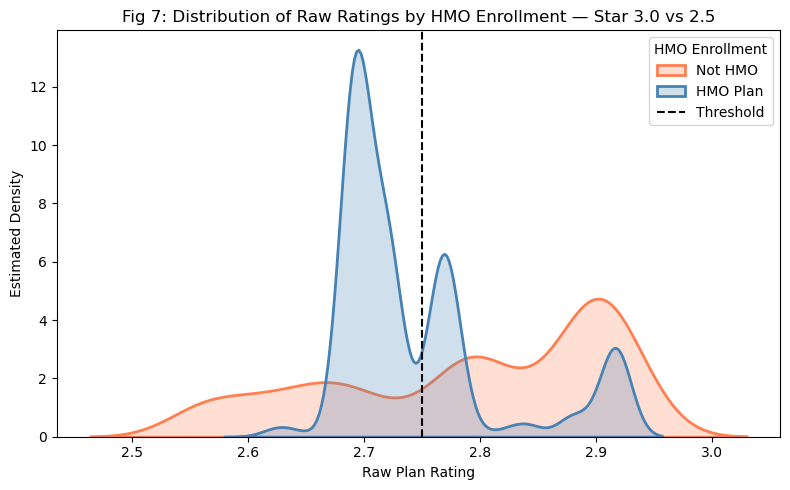

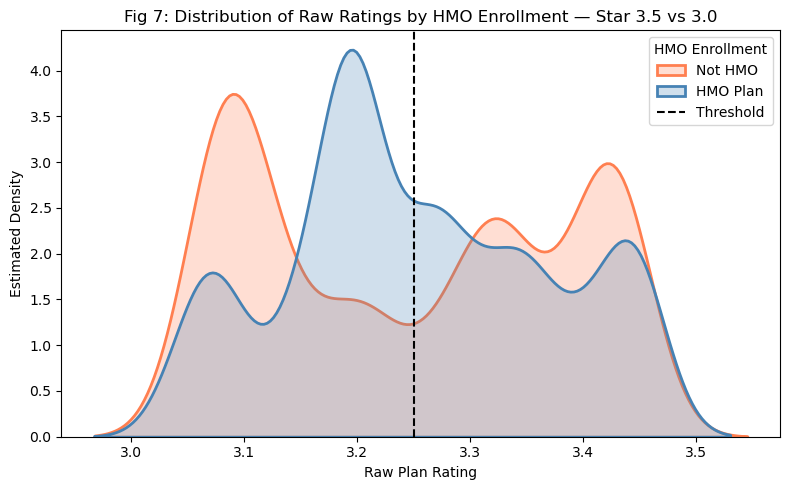

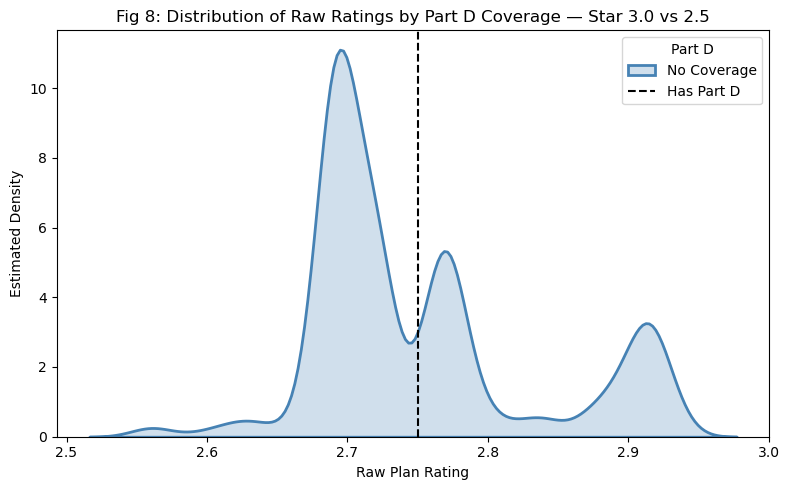

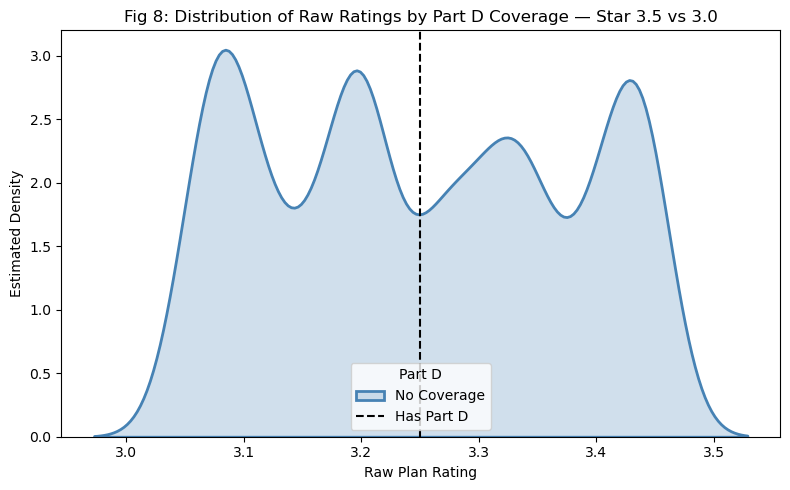

In [193]:
ma_data_clean["is_HMO"] = ma_data_clean["HMO"].astype(int)
ma_data_clean["has_partd"] = ma_data_clean["partd"].map({"Yes": 1, "No": 0}).fillna(0).astype(int)

rating_thresholds = {
    "Star 3.0 vs 2.5": 2.75,
    "Star 3.5 vs 3.0": 3.25
}

for desc, thresh in rating_thresholds.items():
    sample = ma_data_clean[
        ma_data_clean["raw_rating"].between(thresh - 0.2, thresh + 0.2)
    ].copy()

    plt.figure(figsize=(8, 5))
    sns.kdeplot(
        data=sample, x="raw_rating", hue="is_HMO", hue_order=[0, 1],
        fill=True, common_norm=False, linewidth=2,
        palette={0: "steelblue", 1: "coral"}
    )
    plt.axvline(thresh, color="black", linestyle="--", label="Threshold")
    plt.title(f"Fig 7: Distribution of Raw Ratings by HMO Enrollment — {desc}")
    plt.xlabel("Raw Plan Rating")
    plt.ylabel("Estimated Density")
    plt.legend(title="HMO Enrollment", labels=["Not HMO", "HMO Plan", "Threshold"])
    plt.tight_layout()
    plt.show()

for desc, thresh in rating_thresholds.items():
    sample = ma_data_clean[
        ma_data_clean["raw_rating"].between(thresh - 0.2, thresh + 0.2)
    ].copy()

    plt.figure(figsize=(8, 5))
    sns.kdeplot(
        data=sample, x="raw_rating", hue="has_partd", hue_order=[0, 1],
        fill=True, common_norm=False, linewidth=2,
        palette={0: "steelblue", 1: "coral"}
    )
    plt.axvline(thresh, color="black", linestyle="--", label="Threshold")
    plt.title(f"Fig 8: Distribution of Raw Ratings by Part D Coverage — {desc}")
    plt.xlabel("Raw Plan Rating")
    plt.ylabel("Estimated Density")
    plt.legend(title="Part D", labels=["No Coverage", "Has Part D", "Threshold"])
    plt.tight_layout()
    plt.show()

This analysis explores whether Medicare Advantage plans that just clear a quality rating threshold differ in structure from those that fall just short. Specifically, we looked at two plan characteristics—HMO status and Part D drug coverage—around the 2.75 (3.0 vs 2.5 stars) and 3.25 (3.5 vs 3.0 stars) cutoffs. At the 3.0 vs 2.5 threshold, there are clear distinctions. Plans rated just above the cutoff are significantly more likely to be HMOs, with a strong positive estimate of 0.728 for the treatment variable. Interestingly, the running score has a negative relationship with HMO status, implying that, near the cutoff, plans with higher raw quality scores are slightly less likely to be HMOs. This may suggest that plans structured as HMOs are more effective at just reaching the 3.0-star mark, but not necessarily exceeding it. A similar pattern emerges for Part D coverage. Plans rated at 3.0 are more likely to include Part D, with a positive treatment estimate of 0.514. However, the running score again shows a negative coefficient (-2.124), which could indicate that Part D coverage is more common among plans with lower raw scores in this range—perhaps reflecting trade-offs in benefit design or population targeting.

In contrast, at the higher 3.5 vs 3.0 cutoff, the differences are less striking. The treatment estimate for HMO status is essentially zero, suggesting no meaningful difference in structure between plans just below and just above the 3.5-star mark. The running score shows a mild positive relationship with HMO status, but the effect is weaker than what was seen at the lower cutoff. For Part D coverage, the treatment effect is slightly negative (-0.142), suggesting that plans rated at 3.5 are marginally less likely to offer drug coverage than those rated at 3.0. However, the positive estimate on the running score (0.658) implies a subtle upward trend in Part D coverage as raw ratings increase. A few broader patterns emerge. The sample size is much larger for the 3.0 vs 2.5 comparison (over 4,300 plans) than for the 3.5 vs 3.0 cutoff (around 1,360 plans), indicating that the lower cutoff affects a wider segment of the market. The explanatory power of the models also differs: the HMO regression at the lower cutoff has an R² of 0.490, showing a strong relationship, while the Part D model has a lower R² of 0.063. At the higher cutoff, both models have low R² values, suggesting weaker links between the treatment and these plan characteristics. Taken together, these findings suggest that the 3.0-star threshold has a more meaningful effect on plan design and benefit structure than the 3.5-star mark. The stronger treatment effects and better model fit at the lower cutoff point to greater segmentation and behavioral changes by plans trying to hit or surpass the 3.0-star rating—possibly due to the significance of 3.0 stars as a performance benchmark in the eyes of both consumers and regulators.

10. Summarize your findings from 5-9. What is the effect of increasing a star rating on enrollments? Briefly explain your results.

Findings from Question 5: The distribution of rounded star ratings shows that most Medicare Advantage plans are concentrated at the 3.0 and 3.5-star levels. Specifically, 1,305 plans appear to be rounded into 3.0 stars, and 1,540 into 3.5 stars. As ratings increase, the number of plans sharply declines—only 53 plans round into 4.5 stars, and none into the highest 5.0-star category. This pattern suggests that while many plans are able to reach mid-tier quality scores, far fewer achieve the highest ratings.

Findings from Question 6: At the 2.75 cutoff, separating 2.5-star and 3.0-star plans, the analysis reveals a small but statistically significant positive relationship between receiving a 3.0-star rating and market share. The treatment effect is estimated at 0.007 (p < 0.01), indicating that plans just above the threshold see higher enrollment. The running variable itself is negative but not significant, and the overall model fit is low (R² = 0.015), suggesting that star rating alone explains only a small portion of market share differences. For the 3.25 cutoff (3.0 vs 3.5 stars), the treatment estimate is effectively zero and statistically insignificant. However, the running score has a modest but significant negative association with market share (-0.034, p < 0.05). The R² is even lower at 0.008, suggesting that this model captures very little of the variation in enrollment, and the 3.5-star threshold does not appear to influence consumer behavior in a meaningful way.

Findings from Question 7: Question 7 explores how the estimated effects of star ratings on market share vary across different bandwidths. For the 2.75 cutoff, the treatment effect is consistently positive, though it declines slightly as the bandwidth widens. This shows that the 3.0-star mark holds influence over enrollment regardless of bandwidth choice. In contrast, the 3.5-star threshold consistently shows no effect on market share, with estimates hovering near zero across all bandwidths. This reinforces the earlier conclusion that the 3.0-star rating has a more noticeable impact on plan uptake than higher ratings.

Findings from Question 8: The density plots in Figure 6 visualize the distribution of raw domain-based ratings around each cutoff. For the 3.0 vs 2.5 comparison, there’s a sharp peak in plan density near the 2.75 threshold, with two clear clusters forming on either side—indicating a strong separation between plans just below and above the cutoff. A similar but less pronounced pattern is visible at the 3.25 threshold. These patterns support the validity of the regression discontinuity approach, suggesting no manipulation of ratings near the threshold and confirming that the cutoffs meaningfully divide the sample.

Findings from Question 9: Question 9 investigate whether plan characteristics—specifically HMO status and Part D drug coverage—differ around the 3.0 vs 2.5 threshold. HMO plans are more densely clustered just above the cutoff, suggesting a link between organizational structure and the ability to achieve a 3.0-star rating. Similarly, plans offering Part D coverage also show greater density near and above the threshold. These trends are less distinct at the 3.5-star cutoff, further suggesting that the 3.0-star mark is a more meaningful differentiator for both plan features and consumer response.


The evidence suggests that reaching a 3.0-star rating plays a meaningful role in both how plans are structured and how they perform in the marketplace. Plans just over this threshold are more likely to be HMOs and to include Part D coverage, and they attract higher enrollment than similar plans just below the cutoff. However, advancing from 3.0 to 3.5 stars appears to offer little additional advantage in terms of market share, and plan characteristics are less sharply differentiated at that level. While model fit remains low across the board—indicating that many other factors also influence enrollment—the consistency of findings at the 3.0-star threshold suggests it is a key tipping point in both consumer behavior and plan design.